# PHYS 581 - Assignment 3
## Siegfried Peschke - 30032136
### February 15, 2021

In this assignment we explore the evaluation of the error function

  \begin{aligned} \operatorname{erf}(x)
  & = \frac{1}{\sqrt {\pi}} \int_{-x}^{x} e^{-t^{2}} \, dt \\[3ex]
  & = \frac{2}{\sqrt {\pi}} \int_{0}^{x} e^{-t^{2}} \, dt.
  \end{aligned}

the complementary error function
  $$erfc(z) = 1 - erf(z) $$
  
and the Faddeeva function
  $$w(z) = e^{-z^2} erfc(-iz)$$
  
Directly evaluating the integral is computationally costly which begs the question; which algorithm is best suited for the evaluation of these functions?

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.special as special
import scipy.stats as stats
import scipy.integrate as integrate

### Taylor Series Expansion of the Error Function

The error function is an entire function; it has no singularities (except that at infinity) and its Taylor expansion always converges.

The defining integral cannot be evaluated in closed form in terms of elementary functions, but by expanding the integrand $e^{-z^2}$ into its Maclaurin series and integrating term by term, one obtains the error function's Maclaurin series as:

$$ \operatorname{erf}(z) = {\frac{2}{\sqrt {\pi }}} \sum_{n=0}^{\infty }{\frac {(-1)^{n}z^{2n+1}}{n!(2n+1)}}
= {\frac {2}{\sqrt {\pi }}} \left(z-{\frac {z^{3}}{3}}+{\frac {z^{5}}{10}}-{\frac {z^{7}}{42}}+{\frac {z^{9}}{216}}-\cdots \right) $$

which holds for every complex number z. 

In [2]:
def taylor_coeff(x, n):
    """
    This function determines the n'th term in the Maclaurin series expansion of the error function evaluated at x.
    """
    num = (-1.0)**n * x**(2*n+1)
    denum = np.math.factorial(n) * (2*n+1)
    return num/denum

def taylor_erf(x, nterms=20):
    """
    This function calculates the error function evaluated at a point(s) x 
    using the first n terms of the Maclaurin series expansion.
    """
    if (type(x) == complex) or (type(x) == float):
        return sum([taylor_coeff(x, i) for i in range(nterms)]) * (2.0/np.sqrt(np.pi))
    else:
        return [sum([taylor_coeff(a, i) for i in range(nterms)]) * (2.0/np.sqrt(np.pi)) for a in x] 

In [3]:
z = 1.0 + 1.0j
lib_val = special.erf(z)
print('Library value:', lib_val)
print('Taylor Approximation:')
for n in [5,10,20,50,100,150]:
    v = taylor_erf(z, nterms = n)
    print(n, 'terms', v, 
         '\nAbsolute Error:', np.abs(v-lib_val))

Library value: (1.3161512816979477+0.19045346923783463j)
Taylor Approximation:
5 terms (1.2979345551670076+0.2232877293617575j) 
Absolute Error: 0.03754913798462607
10 terms (1.3161685285404148+0.19046579002719302j) 
Absolute Error: 2.119564638074866e-05
20 terms (1.3161512816979348+0.190453469237824j) 
Absolute Error: 1.6699194602363475e-14
50 terms (1.3161512816979477+0.1904534692378347j) 
Absolute Error: 8.326672684688674e-17
100 terms (1.3161512816979477+0.1904534692378347j) 
Absolute Error: 8.326672684688674e-17
150 terms (1.3161512816979477+0.1904534692378347j) 
Absolute Error: 8.326672684688674e-17


Comparing the Taylor series approximation of the error function to the library value for evaluation at $1+i$ we note that at roughly 20 terms the approximation reaches a sufficient precision. Further gains in precision may be made up to roughly 50 terms.

### Continued Fraction Expansion of the Complementary Error Function

 $$ \operatorname{erfc}(z) = \frac{z}{\sqrt{\pi}}e^{-z^2} \cfrac{1}{z^2+ \cfrac{a_1}{1+\cfrac{a_2}{z^2+ \cfrac{a_3}{1+\dotsb}}}}\qquad a_m = \frac{m}{2} $$

In [4]:
def cont_frac(x, nterms):
    """
    This function calculates the error function evaluated at a single point x
    using the first n terms of the continued fraction expansion of the complementary error function.
    """
    frac = 1.0
    for i in range(nterms, 0, -1):
        if i % 2 == 0:
            frac = 1.0 + ((i/2) / frac)
        else:
            frac = x*x + ((i/2) / frac)
    return 1 - ( (x/np.sqrt(np.pi) * np.exp(-x*x)) / frac )

def cont_frac_erf(x, nterms=20):
    """
    This function calculates the error function evaluated at a point(s) x
    using the first n terms of the continued fraction expansion of the complementary error function.
    """
    if (type(x) == complex) or (type(x) == float):
        return cont_frac(x, nterms)
    else:
        return [cont_frac(a, nterms) for a in x]

In [5]:
z = 1.0 + 1.0j
lib_val = special.erf(z)
print('Library value:', lib_val)
print('Continued Fraction Approximation:')
for n in [5,10,20,50,100,150,200,500]:
    v = cont_frac_erf(z, nterms = n)
    print(n, 'terms', v, 
         '\nAbsolute Error:', np.abs(v-lib_val))

Library value: (1.3161512816979477+0.19045346923783463j)
Continued Fraction Approximation:
5 terms (1.3169056364837395+0.18887821673166252j) 
Absolute Error: 0.0017465599334258333
10 terms (1.3163001891057324+0.1906554570241288j) 
Absolute Error: 0.0002509431846159433
20 terms (1.316145312332364+0.1904518707994517j) 
Absolute Error: 6.179670762658921e-06
50 terms (1.3161512792838805+0.1904534724310615j) 
Absolute Error: 4.003051109316583e-09
100 terms (1.3161512816989536+0.1904534692379896j) 
Absolute Error: 1.0177283003863048e-12
150 terms (1.3161512816979495+0.1904534692378348j) 
Absolute Error: 1.784146017590271e-15
200 terms (1.3161512816979477+0.1904534692378347j) 
Absolute Error: 8.326672684688674e-17
500 terms (1.3161512816979477+0.19045346923783468j) 
Absolute Error: 5.551115123125783e-17


Comparing the continued fraction expansion of the complementary error function to the library value for evaluation at $1+i$ we note that at roughly 50 terms the approximation reaches a sufficient precision. Further gains in precision may be made up to roughly 200 terms.

Let us evaluate the functions for values up to $|z| < 9$ and compare to the library values.

In [6]:
x = np.linspace(-9, +9, 900)
y = np.linspace(-9, +9, 900)
xx, yy = np.meshgrid(x, y)
gridxy = 1*xx + 1j*yy
mask_grid = np.ma.masked_where(abs(gridxy) > 9, gridxy)

res = special.erf(mask_grid)
res1 = taylor_erf(mask_grid)
res2 = cont_frac_erf(mask_grid)

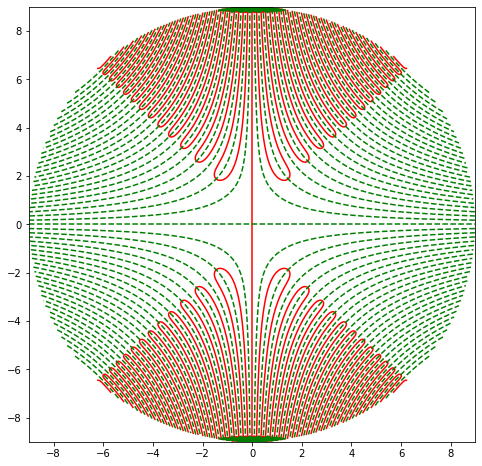

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(8,8))
plt.contour(xx, yy, np.real(res), 100, colors='red', linestyles='solid')
plt.contour(xx, yy, np.imag(res), 100, colors='green', linestyles='dashed' )

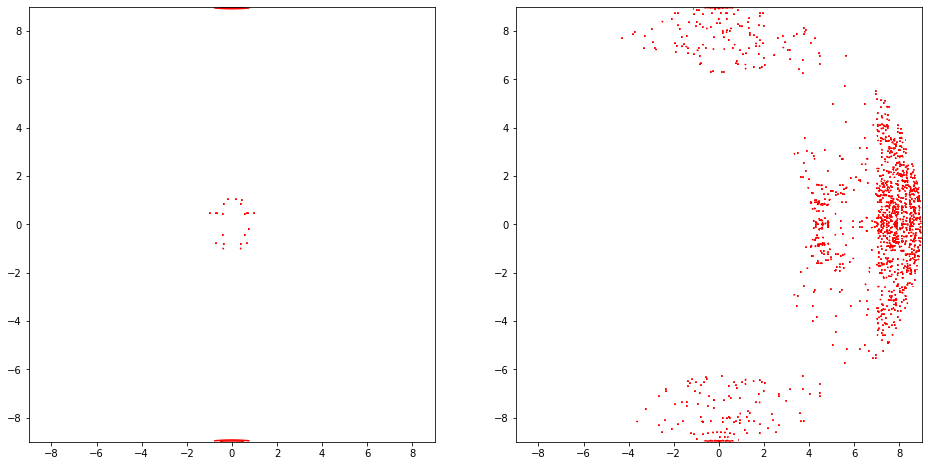

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

plt.sca(axes[0])
plt.contour(xx, yy, np.abs(res-res1), 2, colors='red', linestyles='solid')

plt.sca(axes[1])
plt.contour(xx, yy, np.abs(res-res2), 2, colors='red', linestyles='solid' )

From the above plots we may determine that the Taylor series approximation yields greater precision than the continued fraction expansion at an evaluation of 20 terms. It also appears that as the value of $|z|$ increases, the continued fraction expansion loses precision whereas the Taylor series approximation does not.

Now let us compare the computation speed for various quantities of evaluated terms in order to determine the tradeoff in precision vs computation speed between the two approximations.

In [9]:
z = 1.0 + 1.0j
print('Library Speed:')
%timeit special.erf(z)

print('\nTaylor Series Approximation')
for n in [5,10,20,50,100]:
    print(n, 'Terms')
    %timeit taylor_erf(z, nterms=n)

print('\nContinued Fraction Approximation')
for n in [5,10,20,50,100,200]:
    print(n, 'Terms')
    %timeit cont_frac_erf(z, nterms=n)

Library Speed:
941 ns ± 8.07 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)

Taylor Series Approximation
5 Terms
4.33 µs ± 37.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10 Terms
7.15 µs ± 38.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20 Terms
14.6 µs ± 75 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
50 Terms
43.5 µs ± 188 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
100 Terms
118 µs ± 492 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Continued Fraction Approximation
5 Terms
4.14 µs ± 14 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10 Terms
5.03 µs ± 41.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20 Terms
6.92 µs ± 146 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
50 Terms
12.2 µs ± 57 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
100 Terms
21.3 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
200 Terms
39.1 µs ± 1

It is clear that though the Taylor series approximation yields greater precision, the continued fraction expansion is significantly quicker to evaluate for the same number of terms. The tradeoff between the two seems to be quite even though, since at the asymptote of precision gain, the Taylor series evaluation at 50 terms is roughly equal in speed to that of the continued fraction evaluation at 200 terms. Though at lower values of equal precision, the continued fraction evaluation appears to be slightly faster.

Now let us turn our attention to the evaluation of the Faddeeva function using the Gautschi algorithm.

In [10]:
def gautschi_erf(z):
    """
    This function calculates the Faddeeva function evaluated at a point z
    using the Walter Gautschi 1970 algorithm.
    """
    x = np.real(z)
    y = np.imag(z)
    if (x < 5.33) and (y < 4.29):
        s = (1-(y/4.29)) * np.sqrt(1-(x*x/28.4089))
        h = 1.6*s
        N = 6 + (23*s)
        nu = 9 + (21*s)
    else:
        h = 0
        N = 0
        nu = 8
    if h > 0:
        lam = (2*h) #uparrow N ???
        b = (h == 0) or (lam == 0)
        r1 = r2 = s1 = s2 = 0
        
        for n in (nu, 0, -1):
            np1 = n+1
            t1 = y+h + (np1 * r1)
            t2 = x - (np1 * r2)
            c = 0.5/(t1*t1 + t2*t2)
            r1 = c*t1
            r2 = c*t2
            if (h > 0) and (n <= N):
                t1 = lam + s1
                s1 = r1*t1 - r2*s2
                s2 = r2*t1 + r1*s2
                lam = lam / (2*h)
        
        if y == 0:
            re = np.exp(-x*x)
        else:
            if b:
                re = 1.12837916709551 * r1
            else:
                re = 1.12837916709551 * s1
        if b:
            im = 1.12837916709551 * r2
        else:
            im = 1.12837916709551 * s2
        return re + im*1j

In [11]:
z = 1.0 + 1.0j
lib_val = special.wofz(z)
print('Library value:', lib_val)

v = gautschi_erf(z)
print('Gautschi Algorithm:', v)
print('Absolute Error:', np.abs(v-lib_val))

Library value: (0.30474420525691254+0.2082189382028316j)
Gautschi Algorithm: (0.2892870687787324+0.17414672389143193j)
Absolute Error: 0.03741442043099206


In [12]:
print('Library speed:')
%timeit special.wofz(z)

print('Gautschi Algorithm speed:')
%timeit gautschi_erf(z)

Library speed:
890 ns ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Gautschi Algorithm speed:
17 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Analyzing the absolute precision and speed of calculation of the Gautschi algorithm in comparison to the library function we see a surprisingly low amount of precision and a similar evaluation speed to that of the Taylor series approximation and continued fraction approximation. This may be due to a misimplementation of the algorithm as it has supposed precision up to $10^{-14}$.

In this assignment we learn that various algorithms may be used to evaluate these special functions. The deciding factor between them is the tradeoff between precision and evaluation speed. It seems that algorithms which have great precision at a lower number of evaluated terms lose on the evaluation speed and vice versa. Striking a balance between precision and speed, these algorithms appear roughly similar, and when compared to the optimized library algorithm, they fall drastically short.